# Tanzania Water Wells Project

*This is the notebook where I do __Data Cleaning__.*

# 1. Problem Undersanding

<img src="../Images/water_wells.png">

## Business Problem

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, some are functional, but some are in need of repair while others have failed altogether.

The Government of Tanzania is interested in:


> 1) Finding out the waterpoints in need of repairs and those that have completely failed.

> 2) Identifying patterns in waterpoints that don't function as desired.

This can be done by building a classifier that takes in the attributes of a waterpoint and determines whether it is functional, functional-needing-repairs or non-functional.

By being able to build a good classifier, the government can be able to:

> 1) Easily determine waterpoints that are in need of repairs and those that have completely ceased functioning.

> 2) Identify patterns in non-functional waterpoints and guide against them when building wells in future.

The effects of this classifier would greatly help in improving the living standards of the people of Tanzania by increasing the amount of clean and safe water accessible to the people.

## Data Summary

The data that I am using is from [this site](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/). It has __59400__ records. The records have been collected from the year 2002 October to 2013 December. 

Each record represents a __waterpoint__. 


The __features__ are:

    1. amount_tsh - Total Static Head (amount water available to waterpoint)
    2. date_recorded - The date the row was entered
    3. funder - Who funded the well
    4. gps_height - Altitude of the well
    5. installer - Organization that installed the well
    6. longitude - GPS coordinate
    7. latitude - GPS coordinate
    8. wpt_name - Name of the waterpoint if there is one
    9. num_private - __No Description__
    10. basin - Geographic water basin
    11. subvillage - Geographic location
    12. region - Geographic location
    13. region_code - Geographic location (coded)
    14. district_code - Geographic location (coded)
    15. lga - Geographic location
    16. ward - Geographic location
    17. population - Population around the well
    18. public_meeting - True/False
    19. recorded_by - Group entering this row of data
    20. scheme_management - Who operates the waterpoint
    21. scheme_name - Who operates the waterpoint
    22. permit - If the waterpoint is permitted
    23. construction_year - Year the waterpoint was constructed
    24. extraction_type - The kind of extraction the waterpoint uses
    25. extraction_type_group - The kind of extraction the waterpoint uses
    26. extraction_type_class - The kind of extraction the waterpoint uses
    27. management - How the waterpoint is managed
    28. management_group - How the waterpoint is managed
    29. payment - What the water costs
    30. payment_type - What the water costs
    31. water_quality - The quality of the water
    32. quality_group - The quality of the water
    33. quantity - The quantity of water
    34. quantity_group - The quantity of water
    35. source - The source of the water
    36. source_type - The source of the water
    37. source_class - The source of the water
    38. waterpoint_type - The kind of waterpoint
    40. waterpoint_type_group - The kind of waterpoint


The __target feature__ is `status_group` and it consists of the following categories:

    1. functional - The well is operational and there are no repairs needed
    2. functional needs repair - The well is operational, but needs repairs
    3. non functional - The well is not operational

# 2. Loading the Dataset

## 2.1. Import all necessary Libraries

### All libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

### All functions 

In [2]:
# # Make a plotting class
# class plottingData(object):
#     """ 
#     This class allows you to plot scatterplots, bar, histograms, and lineplots for your data.
#     """
#     def __init__(self, dataframe, xcols, ycols, ):
#         self.dataFrame = dataframe
#         self.x_cols = xcols
#         self.y_cols = ycols

## I'll get back to this later

In [3]:
# A function to drop columns
def drop_cols(dataframe, column=list(), inplace=False):
    'Takes in dataframe and column(s) and drops the specified columns.'
    
    if inplace == True:
        # for inplace dropping
        dataframe.drop(columns=column, inplace=True)
        
        return dataframe    
    else:
        # otherwise
        return dataframe.drop(columns=column, inplace=False)
    


# A function that returns a descending sorted list of values in a series
def sorted_series(df, column):
    "Sorts a column in a dataframe in descending order."
    # sort the column
    sorted_series = df[column].sort_values(ascending=False)
    
    return sorted_series



# A function for plotting scatterplots
def scatterPlot(dataframe, xcol, ycol):
    """
    A function that takes in a dataframe and x and y columns that are involved in the plotting. 
    The xcol and ycol should be in the same dataframe.
    Returns a scatterplot of the columns.
    """    
    # set the figure and axes
    fig, ax = plt.subplots(figsize=(7, 5))
    # plot the scatterplot chart
    dataframe.plot(x = xcol, 
                   y = ycol,
                   kind = 'scatter',
                   ax = ax,
                   title = f'Scatterplot of {xcol} against {ycol}.',
                   xlabel = xcol,
                   ylabel = ycol
                  );



# A function to plot a confusion matrix
def confusionMatrix(dataframe, xcol, ycol):
    """
    Takes in a dataframe, xcol and ycol that sould be in the dataframe and plots a confusion matrix for the columns specified. 
    Returns a confusion matrix.
    """
    # make a cross tab of the columns in use
    # and eliminate the 'All' column and row that come with the result
    confusion_matrix = pd.crosstab(dataframe[ycol], dataframe[xcol], rownames=[ycol], colnames=[xcol], margins=True, ).iloc[:-1, :-1]
    
    # create the axes
    fig, ax = plt.subplots(figsize=(7, 5))
    
    # plot a heatmap of the confusion matrix created above
    sns.heatmap(confusion_matrix, 
                # setting the axis
                ax = ax,
                # enabling labels
                annot = True,                
               );

    
# A function for plotting a histogram
def histPlot(dataframe, column):
    """
    Takes in a dataframe and a column of continuous data and returns a histogram of the column.
    """
    # set the figure
    fig, ax = plt.subplots(figsize=(7, 5))
    x = dataframe[column]
    
    # plot the chart
    # bar hist
    ax.hist(x, bins=100, density=True)
    # line hist
    ax.hist(x, bins=100, density=True, histtype='step')
    
    # set the details
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.set_title(f'A histogram of {column}.');
    


# A function for plotting a bargraph 
def barPlot(dataframe, column):
    """
    Takes in a dataframe and a column of categorical data and returns a bargraph of the column.
    """
    # set the figure
    fig, ax = plt.subplots(figsize=(7, 5))
    x = dataframe[column]
    
    # plot the chart
    ax.bar(x, x)    
    
    # set the details
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'A bargraph of {column}.');

## 2.2. Load the dataset

In [4]:
# the data I am using is in the data folder and are under the name 'training'
# the data is also separated into target and features already
df_features = pd.read_csv('/home/nick/Documents/Flatiron/Phase 3/Water_wells_Project/Data/training features.csv')
df_target = pd.read_csv('/home/nick/Documents/Flatiron/Phase 3/Water_wells_Project/Data/training targets.csv')

df_features.columns, df_target.columns

(Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
        'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
        'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
        'ward', 'population', 'public_meeting', 'recorded_by',
        'scheme_management', 'scheme_name', 'permit', 'construction_year',
        'extraction_type', 'extraction_type_group', 'extraction_type_class',
        'management', 'management_group', 'payment', 'payment_type',
        'water_quality', 'quality_group', 'quantity', 'quantity_group',
        'source', 'source_type', 'source_class', 'waterpoint_type',
        'waterpoint_type_group'],
       dtype='object'),
 Index(['id', 'status_group'], dtype='object'))

In [5]:
# create a variable for the target column
target_column = 'status_group'

df_features.shape, df_target.shape

((59400, 40), (59400, 2))

In [6]:
# join the two to make one whole dataset
df = df_features.join(df_target, rsuffix='_target')

# setting some options
pd.set_option('display.max_columns', 60)

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id_target,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


In [7]:
# drop id_target col as its just a replica of id
df = drop_cols(df, 'id_target')

# 3. Explore the Dataset Structure

In [8]:
# check the info and shape of my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [9]:
df.shape

(59400, 41)

I have 41 columns with 31 of them being of object dtype.

In [10]:
# Check the description
# this will only include columns of numeric datatypes
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [11]:
# now including the object dtype columns alone
df.describe(include='object')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


## 3.1. Checking for Duplicates

In [12]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the data.

## 3.2. Checking for Missing values

In [13]:
missing_values = pd.DataFrame(df.isna().sum(), columns=['value'])
missing_values[missing_values['value'] != 0]

,value
funder,3635
installer,3655
subvillage,371
public_meeting,3334
scheme_management,3877
scheme_name,28166
permit,3056


The columns above are where the missing values are.

### 3.2.1. scheme_name

Scheme_name has approximately half of the records missing. 
This is very bad. Let me see what could be the issue.

In [14]:
# scheme is about who manages the waterpoint
# since columns with prefix scheme basically describe the same thing
# use both of them to see what may be the problem
df[['scheme_management', 'scheme_name']].head(20)

,scheme_management,scheme_name
0,VWC,Roman
1,Other,NaN
2,VWC,Nyumba ya mungu pipe scheme
3,VWC,NaN
4,NaN,NaN
5,VWC,Zingibali
6,VWC,NaN
7,NaN,NaN
8,VWC,NaN
9,NaN,NaN


It is a bit hard to deal with the missing data in scheme_name column. So I will just drop it.

In [15]:
df = drop_cols(df, 'scheme_name')

### 3.2.2. Other columns

Dealing with the other columns with missing values.

In [16]:
# let me see what the other columns with missing values look like
missing_col_list = ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'permit']

# filter the dataframe to see the specified columns above
df[missing_col_list].head(20)

,funder,installer,subvillage,public_meeting,scheme_management,permit
0,Roman,Roman,Mnyusi B,True,VWC,False
1,Grumeti,GRUMETI,Nyamara,NaN,Other,True
2,Lottery Club,World vision,Majengo,True,VWC,True
3,Unicef,UNICEF,Mahakamani,True,VWC,True
4,Action In A,Artisan,Kyanyamisa,True,NaN,True
5,Mkinga Distric Coun,DWE,Moa/Mwereme,True,VWC,True
6,Dwsp,DWSP,Ishinabulandi,True,VWC,True
7,Rwssp,DWE,Nyawishi Center,True,NaN,True
8,Wateraid,Water Aid,Imalauduki,True,VWC,True
9,Isingiro Ho,Artisan,Mkonomre,True,NaN,True


All these columns are of object datatype. 

Therefore, the best method of dealing with the missing values will be filling them with the mode(most frequent) string.

In [17]:
# filling nan values
# instantiate the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# fit the imputer
imputed = imputer.fit_transform(df[missing_col_list])

# create a dataframe of the result above
imputed_df = pd.DataFrame(imputed, columns=missing_col_list, index=df.index)

# check to see if it worked 
imputed_df.isna().sum()

funder               0
installer            0
subvillage           0
public_meeting       0
scheme_management    0
permit               0
dtype: int64

In [18]:
# drop the columns included in the transformation from the original dataframe
df = drop_cols(df, missing_col_list)

# then concatenate the new df with imputed_df
df = pd.concat([df, imputed_df], axis=1)
df.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,district_code,lga,ward,population,recorded_by,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,funder,installer,subvillage,public_meeting,scheme_management,permit
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,11,5,Ludewa,Mundindi,109,GeoData Consultants Ltd,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Roman,Roman,Mnyusi B,True,VWC,False
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,20,2,Serengeti,Natta,280,GeoData Consultants Ltd,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Grumeti,GRUMETI,Nyamara,True,Other,True
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,21,4,Simanjiro,Ngorika,250,GeoData Consultants Ltd,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,Lottery Club,World vision,Majengo,True,VWC,True
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,Nanyumbu,58,GeoData Consultants Ltd,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,Unicef,UNICEF,Mahakamani,True,VWC,True
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kagera,18,1,Karagwe,Nyakasimbi,0,GeoData Consultants Ltd,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Action In A,Artisan,Kyanyamisa,True,VWC,True


All nan values have been dealt with now.

## 3.3. Checking for Other Anomalies in the data

Here I'm investigating anything in the data that might be out of the norm.

### 3.3.1. Checking the most frequent and structure of elements in the object columns of the data

Dealing with columns of object datatype alone.

In [19]:
# checking number of unique values in object columns
object_df = df.select_dtypes(include='object')

# make a dataframe showing the count of unique values in the object columns
objects_nunique = pd.DataFrame(object_df.nunique(), columns=['count'])
objects_nunique

,count
date_recorded,356
wpt_name,37400
basin,9
region,21
lga,125
ward,2092
recorded_by,1
extraction_type,18
extraction_type_group,13
extraction_type_class,7


In [20]:
# call a description of object columns and isolate the top elements and their counts.
top_elements_df = df.describe(include='object').loc[['top', 'freq']]

# turn freq records to percentages
top_elements_df.loc['freq'] = top_elements_df.loc['freq'].map(lambda x: x / 59400 * 100 )
top_elements_df

,date_recorded,wpt_name,basin,region,lga,ward,recorded_by,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,funder,installer,subvillage,public_meeting,scheme_management,permit
top,2011-03-15,none,Lake Victoria,Iringa,Njombe,Igosi,GeoData Consultants Ltd,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Government Of Tanzania,DWE,Madukani,True,VWC,True
freq,0.962963,5.99832,17.2525,8.91246,4.2138,0.516835,100,45.0842,45.0842,45.0842,68.1936,88.367,42.6734,42.6734,85.5522,85.5522,55.8687,55.8687,28.6549,28.6549,77.0943,48.0168,58.2912,54.3081,21.4125,35.4495,1.4798,91.4899,68.468,70.5522


#### 3.3.1.1. Locations

This includes all columns regarding the location of a waterpoint.

In [21]:
df.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [22]:
df.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [23]:
df.lga.value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [24]:
df.ward.value_counts()

Igosi        307
Imalinyi     252
Siha Kati    232
Mdandu       231
Nduruma      217
            ... 
Rasbura        1
Uchindile      1
Linda          1
Simbay         1
Matarawe       1
Name: ward, Length: 2092, dtype: int64

In [25]:
df.subvillage.value_counts()

Madukani       879
Shuleni        506
Majengo        502
Kati           373
Mtakuja        262
              ... 
Tujilinde        1
Mikangaule       1
Kingorwila       1
Nyamalebe C      1
Ntakaingwa       1
Name: subvillage, Length: 19287, dtype: int64

#### 3.3.1.2. source

This includes all columns regarding sources of water for the waterpoints.

In [26]:
df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [27]:
df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [28]:
df[df.source_class == 'surface'].source.value_counts()

river                   9612
rainwater harvesting    2295
lake                     765
dam                      656
Name: source, dtype: int64

#### 3.3.1.3. scheme_management

This includes all columns regarding who operates the waterpoints.

In [29]:
df.scheme_management.value_counts()

VWC                 40670
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

#### 3.3.1.4. management

This includes all columns regarding how the waterpoints are managed.

In [30]:
df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [31]:
df.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [32]:
df[df.management_group == 'user-group'].management.value_counts()

vwc            40507
wug             6515
water board     2933
wua             2535
Name: management, dtype: int64

#### 3.3.1.5. quality

This includes all columns regarding quality of water.

In [33]:
df.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [34]:
df.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

#### 3.3.1.6. payment

This includes all columns regarding payments at the waterpoints.

In [35]:
df.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [36]:
df.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

#### 3.3.1.7. quantity

This includes all columns regarding the quantity of water provided by the waterpoints.

In [37]:
df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [38]:
df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

#### 3.3.1.8. extraction

This inlcudes all columns regarding the method used to extract water for the waterpoints.

In [39]:
df.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [40]:
df.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [41]:
df.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

#### 3.3.1.9. funder

This column is about who is funded the construction of the waterpoint.

In [42]:
df.funder.nunique()

1897

In [43]:
# changing the max row display to allow me to extensively inspect these values
pd.set_option('display.max_rows', 1900)

# view all the value counts

funder_xtics = pd.DataFrame(df.funder.value_counts()).head(1900)
# reset the index 
funder_xtics.reset_index(inplace=True)
funder_xtics.columns

# replace the column names then sort by the new 'index' column that appears
funder_xtics.rename(columns={'index': 'funder', 'funder': 'count'}, inplace=True)
funder_xtics.sort_values(by='funder')

,funder,count
13,0,777
327,A/co Germany,15
187,Aar,33
1046,Abas Ka,1
156,Abasia,43
1088,Abc-ihushi Development Cent,1
467,Abd,7
1708,Abdala,1
1848,Abddwe,1
950,Abdul,1


There are records labelled as 0 which I beleive should be labelled as others instead. So I am changing those records to other.

There are very many inconsistencies in the data in this column, some names are given in different languages i.e Swahili and some of them have typos. 

This makes me want to drop the column but first I need to see what sort of significance it has in predictions.

In [44]:
# changing 0 records to be Other
df.funder = df.funder.replace({'0': 'Others', 'Othod': 'Others'})

#### 3.3.1.9. installer

This column is about who is funded the construction of the waterpoint.

In [45]:
df.installer.nunique()

2145

In [46]:
# changing the max row display to allow me to extensively inspect these values
pd.set_option('display.max_rows', 2200)

# view all the value counts

installer_xtics = pd.DataFrame(df.installer.value_counts()).head(2200)
# reset the index 
installer_xtics.reset_index(inplace=True)
installer_xtics.columns

# replace the column names then sort by the new 'index' column that appears
installer_xtics.rename(columns={'index': 'installer', 'installer': 'count'}, inplace=True)
installer_xtics.sort_values(by='installer')

,installer,count
836,-,3
7,0,777
1276,A.D.B,1
635,AAR,4
199,ABASIA,29
1296,ABD,1
1807,ABDALA,1
1310,ABDUL,1
889,AC,2
775,ACORD,3


The `installer` column has the same issues as the funder column. 

In [47]:
# replacing - and 0 values with others
df.installer = df.installer.replace({'0': 'Others', '-': 'Others', 'Othod': 'Others'})

Based on what I've seen so far, I __don't think__ I am going to use `funder` and `installer` in the model. Unless they happen to have a high correlation with `status_group`.

In [48]:
# return max rows back to a logical number
pd.set_option('display.max_rows', 80)

#### 3.3.1.10. date_recorded

Here I'm just checking the max and min recording dates of the data.

In [49]:
df.date_recorded.min(), df.date_recorded.max()

('2002-10-14', '2013-12-03')

#### 3.3.1.11. status_group

Here I'm checking the distribution of categories in the target column.

In [50]:
# Checking distribution of target categories
pd.DataFrame(df[target_column].value_counts(normalize=True))

,status_group
functional,0.543081
non functional,0.384242
functional needs repair,0.072677


#### conclusions

Some of the characteristics of the dataframe I've observed are:

- `status_group`  ~54% of waterpoints in Tanzania are fully functional. Only ~7% waterpoints are functional but need repair.
- `recorded_by` __~100%__ of the data was recorded by GeoData Consultants Ltd.
- The data has been `recorded` over the year 2002 October to the year 2013 December.
- `basin` ~17% of waterpoints are around Lake Victoria basin.
- `region` ~8% of waterpoints are around Iringa region.
    The hierachy of location data is *basin - region - lga - ward - subvillage.*
- `wpt_name` ~6% waterpoints have no names.
- The method of `extraction` most used is gravity with ~45%. The best generalizing column explaining extraction is `extraction_type_class`.
- `management` ~88% are user-group `management_group` managed which consists of VWC among others, that is the most recurring element in `management` column.
- `scheme_management` I beleive can be used interchangably with `management`.
- `payment` ~42% of the waterpoints are free-to-all. All columns about payments have same data.
- `quantity` ~55% of waterpoints produce enough water.  All columns about payments have same data.
- `quality` ~85% of waterpoints produce good `quality_group` water which is actually soft water `water_quality`.
- `source` ~77% of waterpoints have groundwater as their sources of water (springs are a type of groundwater source).
- `waterpoint` ~58% of waterpoints are communal standpipes (a total of multiple and single communal standpipe types).
- `funder` The Government of Tanzania has funded ~21% of the waterpoints in the country.
- `installer` DWE is the most frequent installer, having installed ~35% of the waterpoints.
- `public_meeting` ~91% of the waterpoints have had public_meetings.
- `permit` ~70% of waterpoints have permits.

### 3.3.2. Checking the most frequent and structure of elements in the numeric columns of the data

Dealing with columns of numeric datatype alone.

In [51]:
# select numeric dtypes
numeric_df = df.select_dtypes(include='number')

# make a dataframe containing the count of unique values
numerics_nunique = pd.DataFrame(numeric_df.nunique(), columns=['count'])
numerics_nunique

,count
id,59400
amount_tsh,98
gps_height,2428
longitude,57516
latitude,57517
num_private,65
region_code,27
district_code,20
population,1049
construction_year,55


`region_code` and `district code` seem like they are categorical variables. However, I am concentrating more on regions for this problem.

#### 3.3.2.1. region_code

Checking the data structure of region data.

In [52]:
# counter checking whether region and region_code nunique value counts match
int(df.region.nunique()) == int(numerics_nunique.loc['region_code'])

False

In [53]:
# check the value counts and make a dataframe
# then rename columns and sort by region code to see any anomaly in the encoding
pd.DataFrame(df.region_code.value_counts()).reset_index().rename(columns={'index': 'region_code', 'region_code': 'count'}).sort_values(by='region_code').T

,11,7,3,10,4,16,21,25,23,9,0,2,12,13,15,8,1,5,6,14,17,24,26,19,18,20,22
region_code,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,24,40,60,80,90,99
count,2201,3024,4379,2513,4040,1609,805,300,390,2640,5300,4639,2093,1979,1808,2816,5011,3324,3047,1969,1583,326,1,1025,1238,917,423


`region_code` and `region` counts aren't equal.

In Tanzania the total number of regions are actually __31__ but the data only includes __21__ regions and their encoding doesn't look like what the data is showing. Therefore I am going to make a new row with the correct encoding and if the record doesn't have an appropriate region, I will give it an encoding of 99 (signifying 'other').

I have outsourced the list of tuples of encoding below from the regions table in [regions of Tanzania](https://en.wikipedia.org/wiki/ISO_3166-2:TZ).

In [54]:
# Dictionary of region correct encoding
correct_region_enc = {'Arusha': 1, 'Dar es Salaam': 2, 'Dodoma': 3, 'Geita': 27, 'Iringa': 4, 'Kagera': 5, 
                      'Katavi': 28, 'Kigoma': 8, 'Kilimanjaro': 9, 'Lindi': 12, 'Manyara': 26, 'Mara': 13,
                      'Mbeya': 14, 'Morogoro': 16, 'Mtwara': 17, 'Mwanza': 18, 'Njombe': 29, 'Pemba North': 6,
                      'Pemba South': 10, 'Pwani': 19, 'Rukwa': 20, 'Ruvuma': 21, 'Shinyanga': 22, 'Simiyu': 30,
                      'Singida': 23, 'Tabora': 24, 'Tanga': 25, 'Zanzibar North': 7, 'Zanzibar West': 15, 
                      'Zanzibar South': 11, 'Songwe': 31}


In [55]:
# I am now going to make a new column containting corrected region_codes
df['region_code_corr'] = df.region.replace(correct_region_enc).copy()

# now drop the original region_code column
df = drop_cols(df, 'region_code', inplace=True)

#### 3.3.2.2. construction_year

Checking the distribution of data about construction year.

In [56]:
# checking the min and max values
print(df.construction_year.min(), ',', df.construction_year.max())

# checking value counts
df.construction_year.value_counts(normalize=True).head()

0 , 2013


0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
Name: construction_year, dtype: float64

Turns out there are values here recorded as 0 and they take up ~34% of the records.

In [57]:
# create a dataframe of construction year value counts grouped by regions
grouped_construction = pd.DataFrame(df.groupby(by='region_code_corr')['construction_year'].sum())

# rename construction_year to sum
grouped_construction.rename(columns={'construction_year': 'sum'}, inplace=True)

# select regions with 0 records of construcion year
grouped_construction[grouped_construction['sum'] == 0]

,sum
region_code_corr,
3,0
5,0
14,0
24,0


Waterpoints in `Dodoma`, `Kagera`, `Mbeya`, `Taboro` regions have no construction_year records. I am going to fill up the 0 values with the median construction year.

In [58]:
# fill all the 0 records of construction year with the median construction year
imp = SimpleImputer(missing_values=0, strategy='median')

# fit and transform the column using the imputer
df.construction_year = imp.fit_transform(np.array(df.construction_year).reshape(-1,1))

# check to see if changes have taken place
df.construction_year.value_counts(normalize=True).head()


2000.0    0.383838
2010.0    0.044529
2008.0    0.043990
2009.0    0.042643
2007.0    0.026717
Name: construction_year, dtype: float64

#### 3.3.2.3. amount_tsh

Checking the counts of 0 for total static head of the waterpoints.

In [59]:
# checking the distibuion of values
df.amount_tsh.value_counts(normalize=True).head()

0.0       0.700993
500.0     0.052222
50.0      0.041616
1000.0    0.025051
20.0      0.024630
Name: amount_tsh, dtype: float64

70% of waterpoints in the country have 0 total static head.

In [60]:
# checking if there's anything peculiar with these 0 records
df[df['amount_tsh'] == 0].head()

# nothing stands out

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,district_code,lga,ward,population,recorded_by,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,funder,installer,subvillage,public_meeting,scheme_management,permit,region_code_corr
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,2,Serengeti,Natta,280,GeoData Consultants Ltd,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Grumeti,GRUMETI,Nyamara,True,Other,True,13
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,GeoData Consultants Ltd,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,Unicef,UNICEF,Mahakamani,True,VWC,True,17
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,0,GeoData Consultants Ltd,2000.0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Action In A,Artisan,Kyanyamisa,True,VWC,True,5
6,19816,0.0,2012-10-01,0,33.362410,-3.766365,Kwa Ngomho,0,Internal,Shinyanga,3,Shinyanga Rural,Samuye,0,GeoData Consultants Ltd,2000.0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,Dwsp,DWSP,Ishinabulandi,True,VWC,True,22
7,54551,0.0,2012-10-09,0,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Shinyanga,3,Kahama,Chambo,0,GeoData Consultants Ltd,2000.0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,Rwssp,DWE,Nyawishi Center,True,VWC,True,22


#### 3.3.2.4. gps_height

Checking the distribution of waterpoint altitudes.

In [61]:
# check the min and max values
print(df.gps_height.min(), ',', df.gps_height.max())

# checking the distibuion of values
df.gps_height.value_counts(normalize=True).head()

-90 , 2770


 0     0.344074
-15    0.001010
-16    0.000926
-13    0.000926
-20    0.000875
Name: gps_height, dtype: float64

~34% of waterpoints are at sea level.

#### 3.3.2.5. population

Checking the distribution of population around the waterpoints.

In [62]:
# checking the min and max values
print(df.population.min(), ',', df.population.max())

# checking the distibuion of values
df.population.value_counts(normalize=True)

0 , 30500


0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
3241    0.000017
1960    0.000017
1685    0.000017
2248    0.000017
1439    0.000017
Name: population, Length: 1049, dtype: float64

~36% of the waterpoints have no settlements around them.

#### 3.3.2.6. Coordinates

This includes latitude and longitude.

In [63]:
# checking the min and max values of longitude
print(sorted_series(df, 'longitude'))

# checking the min and max values of latitude
print(sorted_series(df, 'latitude'))

735      40.345193
54030    40.344301
32602    40.325240
42877    40.325226
32185    40.323402
           ...    
37925     0.000000
26246     0.000000
53639     0.000000
47746     0.000000
24201     0.000000
Name: longitude, Length: 59400, dtype: float64
22559   -2.000000e-08
32382   -2.000000e-08
2953    -2.000000e-08
32423   -2.000000e-08
2958    -2.000000e-08
             ...     
27708   -1.156680e+01
51116   -1.156858e+01
7328    -1.158630e+01
57743   -1.164838e+01
43832   -1.164944e+01
Name: latitude, Length: 59400, dtype: float64


From what I've researched, the __approximate limits for the coordinates__ of Tanzania are:
- Latitudes
    - min = -11.76
    - max = -1

- Longitudes
    - min = 29.341
    - max = 40.433
    
Though these are very rough estimates and do not depict the are of Tanzania very well, they should help in weeding out the bad coordinates.

In [64]:
df[df['longitude'] == 0]['latitude'].value_counts()

-2.000000e-08    1812
Name: latitude, dtype: int64

Quite a number of waterpoints have longitude labeled as 0 which doesn't make sense considering where Tanzania is.

Moreover, records with 0 value for longitude have -2.00e-08 as the recorded latitude value. And these records are 1812 in number.

I am going to drop these kind of records

In [65]:
# dropping values recorded as 0 longitude
df_cord = df[df['longitude'] > 0].reset_index(drop=True)

# checking the min and max values of longitude after dropping
print(sorted_series(df_cord, 'longitude'))

# checking the min and max values of latitude after dropping
print(sorted_series(df_cord, 'latitude'))

715      40.345193
52391    40.344301
31619    40.325240
41582    40.325226
31213    40.323402
           ...    
52312    29.611947
23357    29.610965
39106    29.610321
37676    29.607201
34290    29.607122
Name: longitude, Length: 57588, dtype: float64
45762    -0.998464
21485    -0.998916
51603    -0.999012
25082    -0.999117
49149    -0.999469
           ...    
26872   -11.566805
49566   -11.568577
7109    -11.586297
55981   -11.648378
42505   -11.649440
Name: latitude, Length: 57588, dtype: float64


The remaining coordinate values are more sensible for Tanzania.

#### 3.3.2.7. num_private

Checking the distribution num_private and maybe get to understand what that piece of data is supposed to descibe.

In [66]:
# checking the min and max values
print(df_cord.num_private.min(), ',', df_cord.num_private.max())

# checking the distibuion of values
df_cord.num_private.value_counts(normalize=True)

0 , 1776


0       0.986855
6       0.001407
1       0.001268
5       0.000799
8       0.000799
32      0.000695
45      0.000625
15      0.000608
39      0.000521
93      0.000486
3       0.000469
7       0.000451
2       0.000399
65      0.000382
47      0.000365
102     0.000347
4       0.000347
17      0.000295
80      0.000260
20      0.000243
25      0.000208
11      0.000191
41      0.000174
34      0.000174
16      0.000139
120     0.000122
150     0.000104
22      0.000104
12      0.000087
24      0.000087
50      0.000087
38      0.000069
58      0.000069
9       0.000069
10      0.000069
14      0.000052
61      0.000052
27      0.000035
26      0.000035
160     0.000017
30      0.000017
698     0.000017
60      0.000017
1402    0.000017
450     0.000017
668     0.000017
131     0.000017
35      0.000017
672     0.000017
42      0.000017
136     0.000017
87      0.000017
300     0.000017
280     0.000017
141     0.000017
62      0.000017
111     0.000017
240     0.000017
1776    0.0000

~98% of waterpoints have num_private as 0. It is very hard to understand this column in the data. So I'm likely dropping it.

#### Conclusions:

- `gps_height` ~34% of waterpoints are at sea level.
- `population` ~36% of the waterpoints have no settlements around them.
- `amount_tsh` ~70% of waterpoints in the country have 0 total static head.
- `num_private` ~98% of waterpoints have num_private as 0. It is very hard to understand this column in the data. So I'm likely dropping it.

## 3.4. Dropping some unnecessary features.

From the analysis above I have identified some features that are repetitions of others, some simply explain a hierachy, and some have unusable data. These are the sorts of features I am dropping. They are:
1. These are all data about location and are hierachical:
    - basin
    - region
    - district_code
    - lga
    - ward
    - subvillage

    
2. These are also hierachical but explain on other attributes of the waterpoint:
    - extraction_type
    - extraction_type_group
    - management
    - scheme_management
    - payment
    - water_quality
    - quantity
    - source
    - source_type
    - waterpoint_type


3. These ones have many errors in their recording making the data too chaotic to be used:
    - funder
    - installer
    - wpt_name
    - num_private; originally this column has no description and it's hard to understand what the data is supposed to communicate.

    

4. These last ones just can't help with anything:
    - recorded_by
    - id

In [67]:
# list of columns I am going to drop
to_drop = ['basin', 'region', 'district_code', 'lga', 'ward', 'subvillage', 'extraction_type', 
           'extraction_type_group', 'management', 'scheme_management', 'payment', 'water_quality', 
           'quantity', 'source', 'source_type', 'waterpoint_type', 'funder', 'installer', 'wpt_name', 
           'num_private', 'recorded_by', 'id']

# Dropping the columns specified above
df_alt = drop_cols(df_cord, to_drop).reset_index(drop=True)

print(df_alt.shape)
df_alt.head()

(57588, 18)


,amount_tsh,date_recorded,gps_height,longitude,latitude,population,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,public_meeting,permit,region_code_corr
0,6000.0,2011-03-14,1390,34.938093,-9.856322,109,1999.0,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional,True,False,4
1,0.0,2013-03-06,1399,34.698766,-2.147466,280,2010.0,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,functional,True,True,13
2,25.0,2013-02-25,686,37.460664,-3.821329,250,2009.0,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional,True,True,26
3,0.0,2013-01-28,263,38.486161,-11.155298,58,1986.0,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,non functional,True,True,17
4,0.0,2011-07-13,0,31.130847,-1.825359,0,2000.0,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional,True,True,5


# 4. Explore the Relationships and Distribtions of the Columns

## 4.1. Bivariate analysis

I am going to check the relationship of the various features to the target `status_group`.

### 4.1.1. Numeric features vs status group

The analysis here involves only numeric features against status group.

In [68]:
df_alt.select_dtypes(include='number').nunique()

amount_tsh              98
gps_height            2428
longitude            57515
latitude             57516
population            1049
construction_year       54
region_code_corr        21
dtype: int64

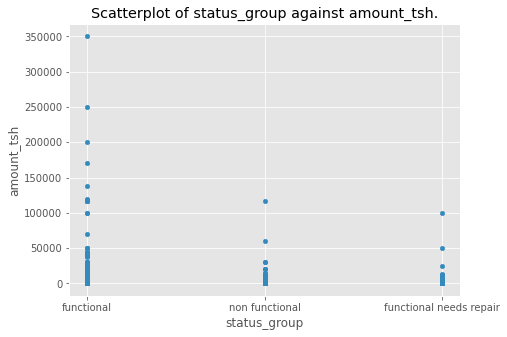

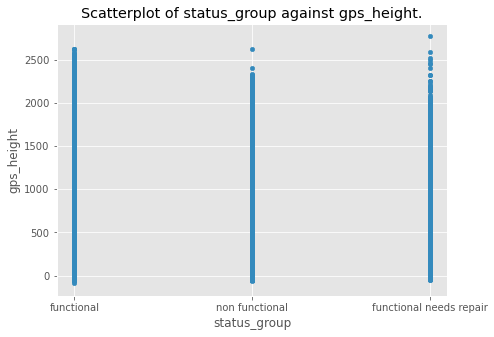

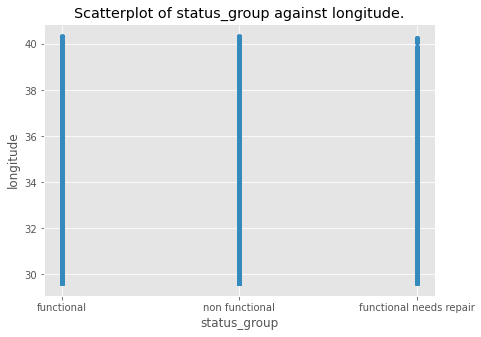

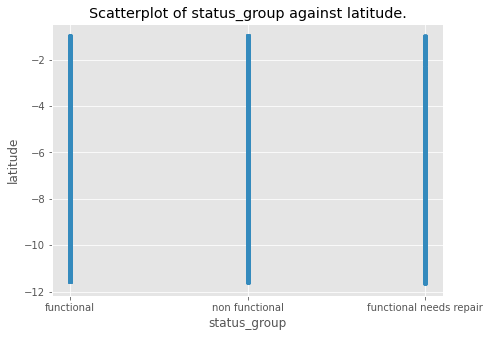

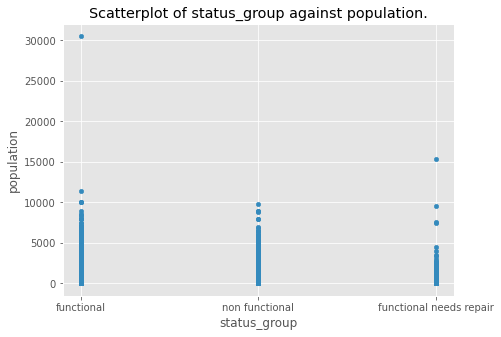

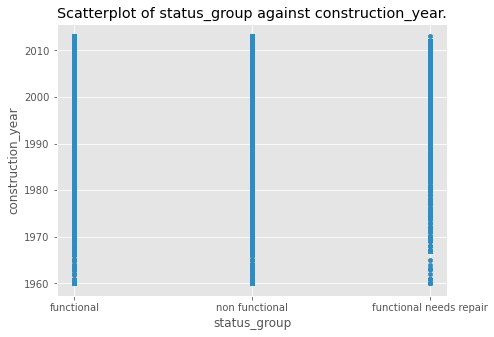

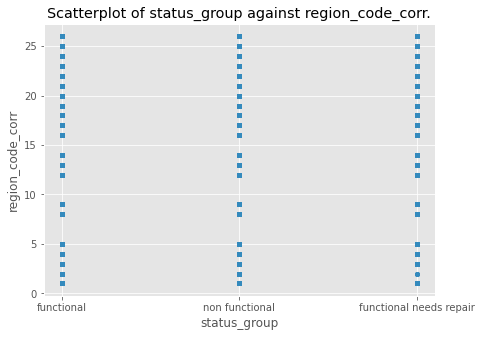

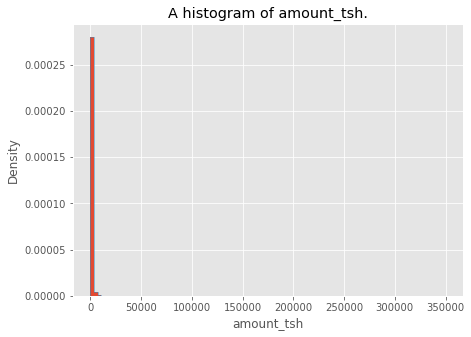

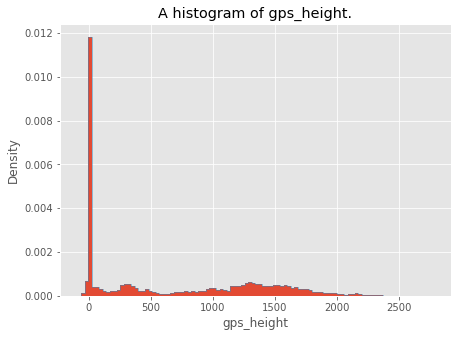

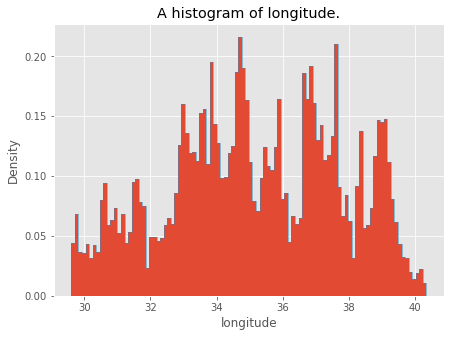

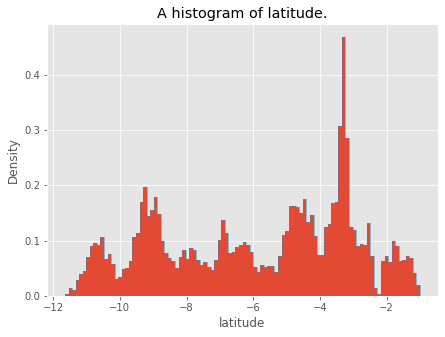

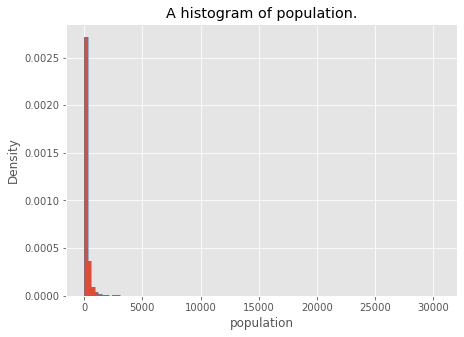

In [69]:
# scatterplots only for the numeric classes
for column in df_alt.select_dtypes(include='number').columns:
    scatterPlot(df_alt, target_column, column)
    plt.savefig(f'/home/nick/Documents/Flatiron/Phase 3/Water_wells_Project/Images/Scatterplot of {column} against {target_column} before dealing with outliers')
    
    
# Histograms for the numeric classes with outliers
for column in df_alt.select_dtypes(include='number').columns:
    if df_alt[column].nunique() > 60:
        histPlot(df_alt, column)
        plt.savefig(f'/home/nick/Documents/Flatiron/Phase 3/Water_wells_Project/Images/Histogram of {column} before dealing with outliers')
        plt.show()


From the charts above it is easy to detect columns where there are outliers:

- amount_tsh values above and equal to 10,000 could be considered as outliers.
- population values above and equal to 10,000 could be considered as outliers.

In [70]:
# check how many records fall in the classification of outliers above
df_alt[(df_alt['amount_tsh'] >= 10000) | (df_alt['population'] >= 10000)].count()[0]

243

Only 243 values fall in the outliers classification out of 57,588 records. Dropping this number of columns is tolerable so I am doing just that.

In [71]:
# dropping values past 10000 in population and amount_tsh
df_out = df_alt[(df_alt['amount_tsh'] < 10000) & (df_alt['population'] < 10000)].reset_index(drop=True)
df_out.shape

(57345, 18)

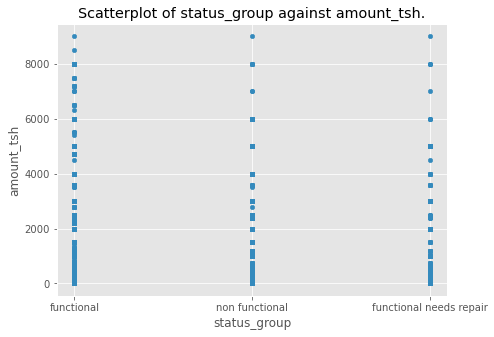

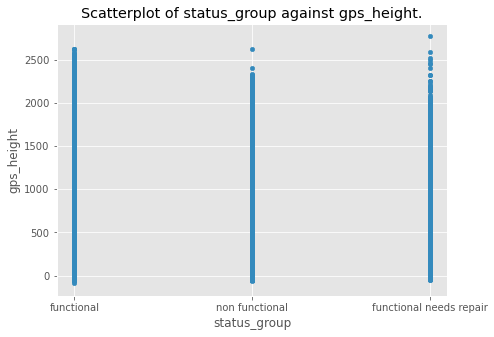

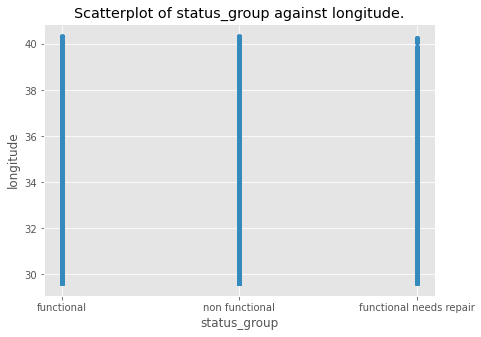

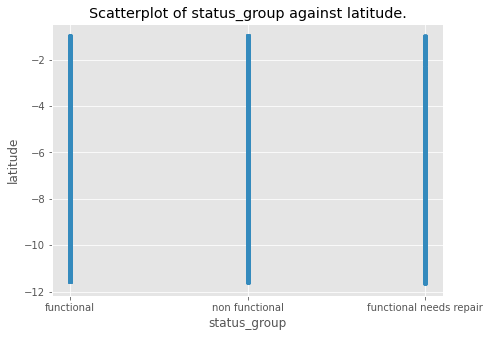

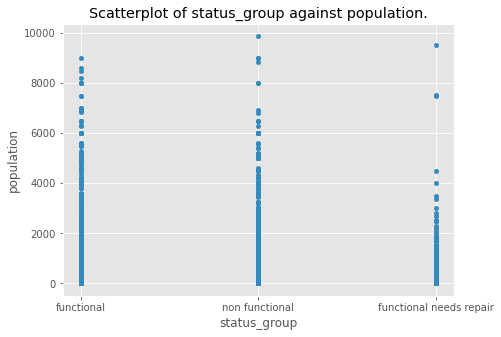

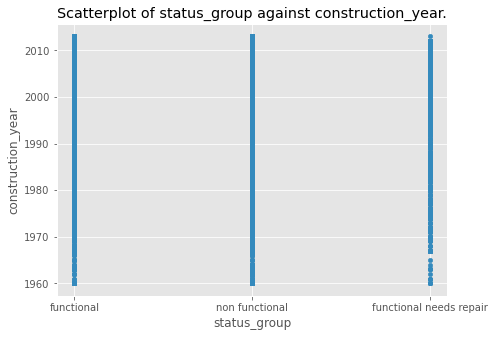

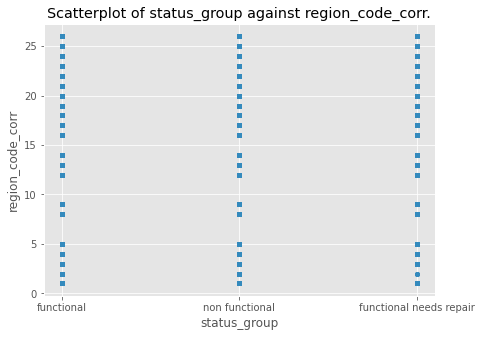

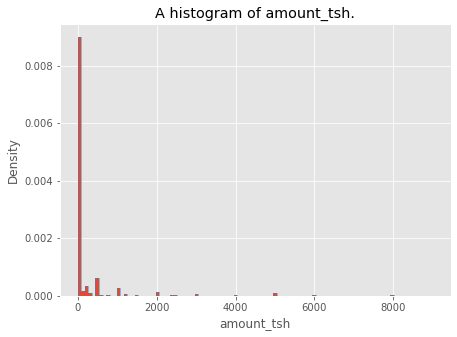

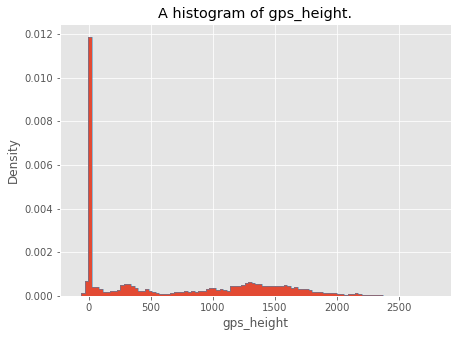

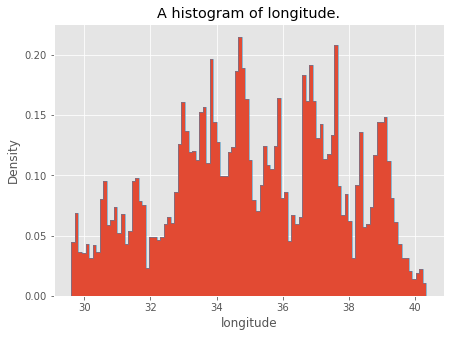

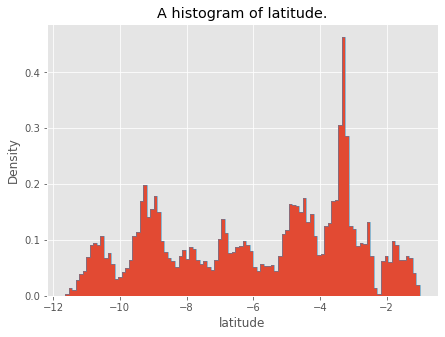

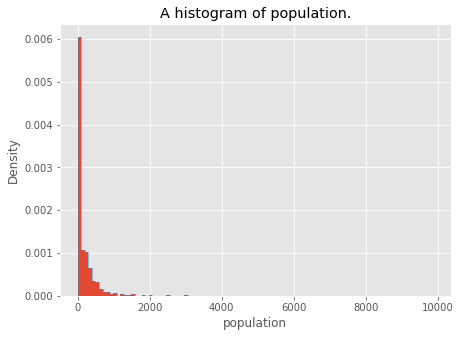

In [72]:
# check to see what the distribution looks like now
for column in df_out.select_dtypes(include='number').columns:
    scatterPlot(df_out, target_column, column)
    plt.savefig(f'/home/nick/Documents/Flatiron/Phase 3/Water_wells_Project/Images/Scatterplot of {column} against {target_column} after dealing with outliers')


# Histograms for the numeric classes without outliers
for column in df_out.select_dtypes(include='number').columns:
    if df_out[column].nunique() > 60:
        histPlot(df_out, column)
        plt.savefig(f'/home/nick/Documents/Flatiron/Phase 3/Water_wells_Project/Images/Histogram of {column} after dealing with outliers')
        plt.show()
    
# the distributions look more sensible now

#### 4.1.1.1. population

Checking if there is any differences in waterpoints that have people living around and those that don't.

In [73]:
df_out[df_out['population'] == 0]['status_group'].value_counts(normalize=True)

functional                 0.531095
non functional             0.397860
functional needs repair    0.071045
Name: status_group, dtype: float64

In [74]:
df_out[df_out['population'] != 0]['status_group'].value_counts(normalize=True)

functional                 0.550201
non functional             0.382776
functional needs repair    0.067023
Name: status_group, dtype: float64

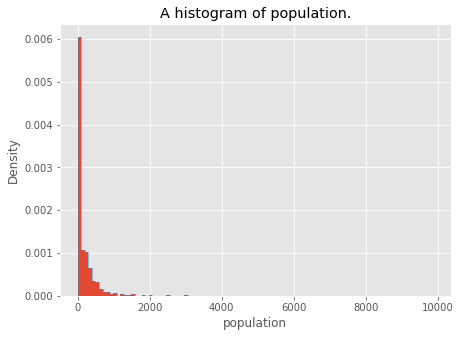

In [75]:
histPlot(df_out, 'population')

#### 4.1.1.2. gps_height

Checking if there is any differences in waterpoints that are at sea level and those that aren't.

In [76]:
df_out[df_out['gps_height'] == 0]['status_group'].value_counts(normalize=True)

functional                 0.515355
non functional             0.410716
functional needs repair    0.073929
Name: status_group, dtype: float64

In [77]:
df_out[df_out['gps_height'] != 0]['status_group'].value_counts(normalize=True)

functional                 0.557323
non functional             0.376947
functional needs repair    0.065730
Name: status_group, dtype: float64

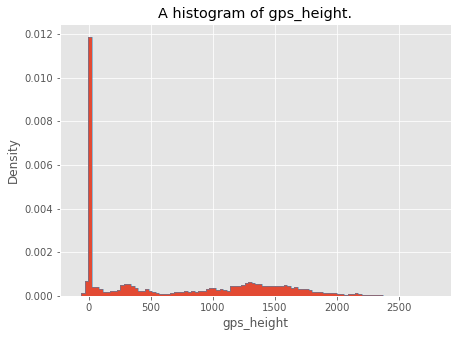

In [78]:
histPlot(df_out, 'gps_height')

#### 4.1.1.3. amount_tsh

Checking if there is any differences in waterpoints that have 0 total static head and those that don't.

In [79]:
df_out[df_out['amount_tsh'] == 0]['status_group'].value_counts(normalize=True)

functional                 0.472931
non functional             0.460250
functional needs repair    0.066819
Name: status_group, dtype: float64

In [80]:
df_out[df_out['amount_tsh'] != 0]['status_group'].value_counts(normalize=True)

functional                 0.704526
non functional             0.223503
functional needs repair    0.071971
Name: status_group, dtype: float64

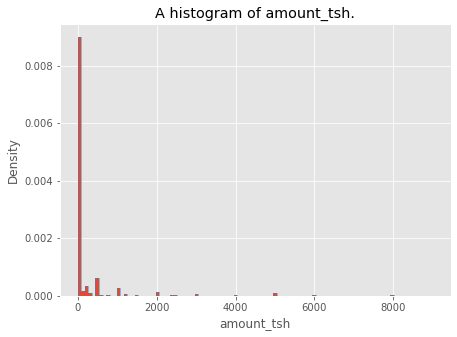

In [81]:
histPlot(df_out, 'amount_tsh')

#### Conclusions:

- Although the difference in class compositions in `gps_height` and `population` is small there could be more intricate effects therefore I'll just leave the columns as is.
- `amount_tsh` waterpoints with total static head have many more functional ones than those with 0 total static head.


### 4.1.2. Object features vs status group

The analysis here involves only object features against status group.

I can do a confusion matrix for all columns (except `date_recorded` and `status_group`) against status group. This is because these columns aren't categorical and status_group is what we are checking against.

In [82]:
# describe the object columns to identify the categorical columns
df_out.groupby(by='status_group').describe(include='object').T

status_group                          functional functional needs repair  \
date_recorded         count                31178                    3922   
                      unique                 332                     264   
                      top             2011-03-17              2011-04-17   
                      freq                   381                      77   
extraction_type_class count                31178                    3922   
                      unique                   7                       7   
                      top                gravity                 gravity   
                      freq                 15888                    2685   
management_group      count                31178                    3922   
                      unique                   5                       5   
                      top             user-group              user-group   
                      freq                 27260                    3543   
payment_type          count                31178                    3922   
                      unique                   7                       7   
                      top              never pay               never pay   
                      freq                 10960                    1662   
quality_group         count                31178                    3922   
                      unique                   6                       6   
                      top                   good                    good   
                      freq                 27779                    3597   
quantity_group        count                31178                    3922   
                      unique                   5                       5   
                      top                 enough                  enough   
                      freq                 20958                    2156   
source_class          count                31178                    3922   
                      unique                   3                       3   
                      top            groundwater             groundwater   
                      freq                 23927                    2367   
waterpoint_type_group count                31178                    3922   
                      unique                   6                       5   
                      top     communal standpipe      communal standpipe   
                      freq                 19681                    2883   
public_meeting        count                31178                    3922   
                      unique                   2                       2   
                      top                   True                    True   
                      freq                 29037                    3567   
permit                count                31178                    3922   
                      unique                   2                       2   
                      top                   True                    True   
                      freq                 22692                    2947   

status_group                      non functional  
date_recorded         count                22245  
                      unique                 328  
                      top             2013-02-03  
                      freq                   247  
extraction_type_class count                22245  
                      unique                   7  
                      top                gravity  
                      freq                  7972  
management_group      count                22245  
                      unique                   5  
                      top             user-group  
                      freq                 19784  
payment_type          count                22245  
                      unique                   7  
                      top              never pay  
                      freq                 11752  
quality_group   

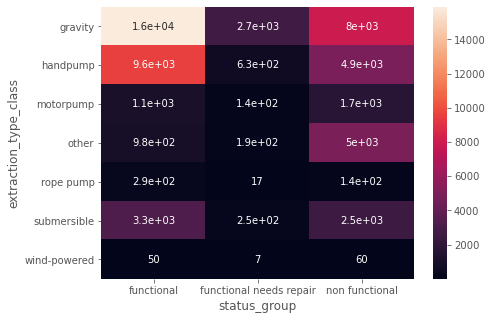

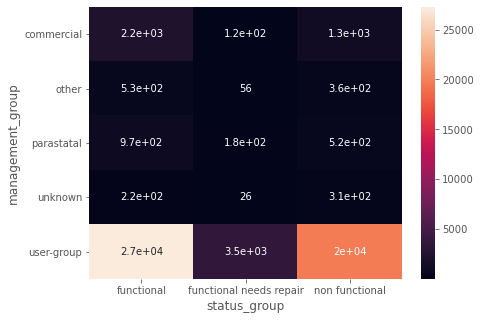

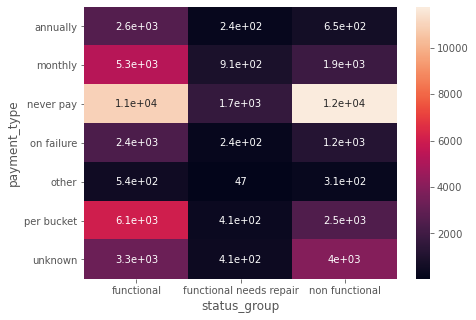

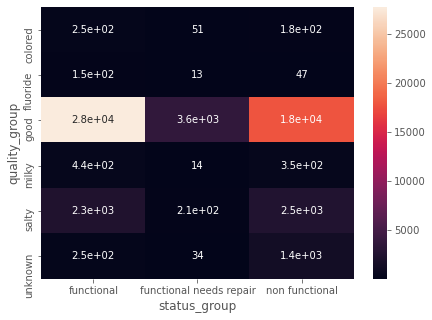

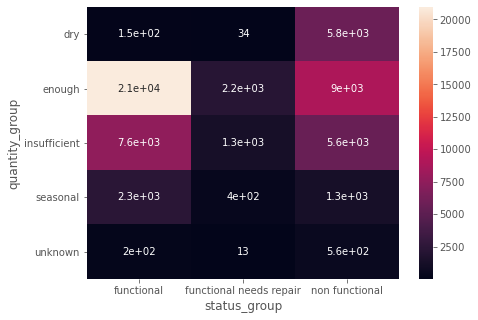

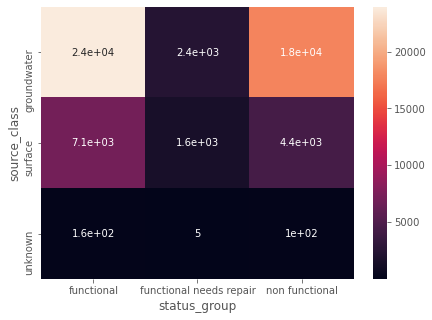

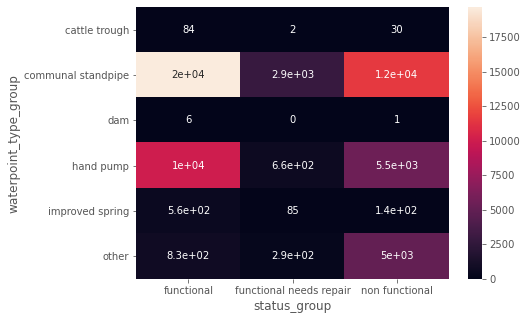

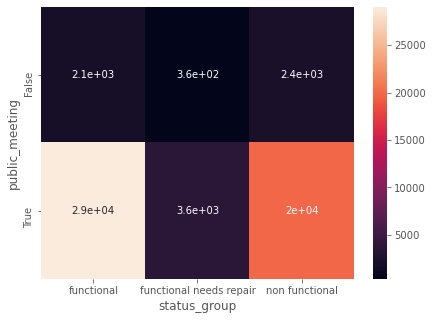

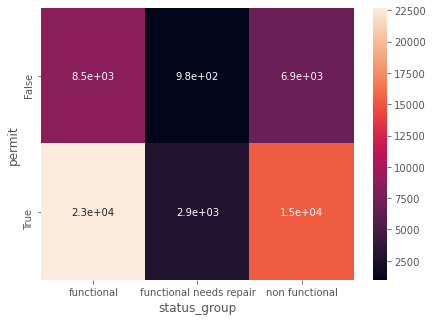

In [83]:
# check to see what the confusion matrixes of the various object columns
# excluding wpt_name and date_recorded
for column in df_out.drop(columns=['date_recorded', 'status_group']).select_dtypes(include='object').columns:
    confusionMatrix(df_out, target_column, column)
    plt.savefig(f'/home/nick/Documents/Flatiron/Phase 3/Water_wells_Project/Images/Confusion matrix of {column} and {target_column}')
    

#### 4.1.2.1. permit

Checking if there is any differences in waterpoints that have permits and those that don't.

In [84]:
df_out[df_out['permit'] == True]['status_group'].value_counts(normalize=True)

functional                 0.554275
non functional             0.373742
functional needs repair    0.071983
Name: status_group, dtype: float64

In [85]:
df_out[df_out['permit'] == False]['status_group'].value_counts(normalize=True)

functional                 0.517281
non functional             0.423286
functional needs repair    0.059433
Name: status_group, dtype: float64

#### 4.1.2.2. public_meeting

Checking if there is any differences in waterpoints that had public meetings and those that didn't.

In [86]:
df_out[df_out['public_meeting'] == True]['status_group'].value_counts(normalize=True)

functional                 0.553265
non functional             0.378770
functional needs repair    0.067965
Name: status_group, dtype: float64

In [87]:
df_out[df_out['public_meeting'] == False]['status_group'].value_counts(normalize=True)

non functional             0.486631
functional                 0.440354
functional needs repair    0.073015
Name: status_group, dtype: float64

#### Conclusions

- Instead of having a `construction_year` and a `date_recorded` column, I will make a __new__ `age` column that records the age of a waterpoint at the time it was recorded.

## 4.2. Engineering some columns

### 4.2.1. age

First I have to extract the year values from date_recorded column then:

    age = date_recorded(year) - construction_year

In [88]:
# extract the date column
date_rec = df_out['date_recorded']
construction_year = df_out['construction_year']
year_rec = []
age_rec = []
negative_age = 0
zero_age = 0

# loop through date_rec to extract the year and append to year_rec
for record in date_rec:
    year = record[0:4]
    year = int(year)
    year_rec.append(year)
    
# zip together construction year and year_rec lists 
time_rec = list(zip(construction_year, year_rec))

# now calculate the age
for record in time_rec:
    age = record[1] - record[0]
    age = int(age)
    age_rec.append(age)
    
# checking for records where age is negative
for rec in age_rec:
    if rec < 0:
        negative_age += 1
        
    elif rec == 0:
        zero_age += 1
        
        
        
print(f'There are {negative_age} waterpoints with Negative age records and {zero_age} waterpoints with Zero age records.')  

There are 9 waterpoints with Negative age records and 587 waterpoints with Zero age records.


Having a 0 age value can be interpreted as the waterpoint details were recorded on the same year it was constructed. 

Therefore, having negative age could mean that the waterpoint details were recorded before their construction was finished.

Add an `age` column to the dataframe to see if there is anything peculiar about these 9 records.

In [89]:
# create/add age column
df_out['age'] = age_rec

# investigate the data where age < 0
negative_age_df = df_out[df_out['age'] < 0]

print(f"Unique ages are {df_out['age'].nunique()} in number.")
negative_age_df

Unique ages are 60 in number.


,amount_tsh,date_recorded,gps_height,longitude,latitude,population,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,public_meeting,permit,region_code_corr,age
8429,0.0,2004-05-01,86,38.959776,-5.247278,120,2008.0,handpump,user-group,never pay,salty,dry,groundwater,hand pump,non functional,True,True,25,-4
10094,20.0,2004-12-01,307,38.768656,-7.298419,1,2006.0,handpump,user-group,per bucket,good,enough,groundwater,hand pump,non functional,True,False,19,-2
12911,100.0,2004-06-01,1331,34.290885,-1.699609,80,2011.0,rope pump,other,per bucket,good,enough,groundwater,hand pump,functional,True,True,13,-7
22562,50.0,2004-03-01,239,39.272736,-11.019000,317,2009.0,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,functional,True,False,17,-5
26559,500.0,2004-01-07,1611,34.900561,-8.873813,65,2009.0,handpump,user-group,on failure,good,enough,groundwater,hand pump,functional,True,False,4,-5
31503,0.0,2004-03-01,1856,31.539761,-7.983106,900,2005.0,gravity,user-group,never pay,good,dry,groundwater,communal standpipe,non functional,True,True,20,-1
32788,0.0,2004-03-01,-27,39.283105,-7.422852,200,2007.0,handpump,user-group,never pay,good,seasonal,groundwater,hand pump,non functional,True,False,19,-3
38206,0.0,2004-03-06,301,38.558421,-5.140405,713,2009.0,other,user-group,never pay,good,dry,groundwater,other,non functional,True,False,25,-5
46871,0.0,2004-12-01,284,38.929212,-7.111349,185,2008.0,gravity,commercial,never pay,good,enough,surface,communal standpipe,functional,True,False,19,-4


Aside from the fact that they were all recorded in the year 2004, everything else is okay.

Also, age could be considered as categorical due to its number of unique values.

#### Dropping date_recorded and construction_year

In [90]:
# dropping said columns
final_df = drop_cols(df_out, ['date_recorded', 'construction_year']).reset_index(drop=True)


# 5. Exporting cleaned data

Exporting the final dataframe that has gone through cleaning and adjustments.

In [91]:
# change name of region_code_corr to region_code and 
final_df = final_df.rename(columns={'region_code_corr': 'region_code', 
                                    'extraction_type_class': 'extraction_class', 
                                    'waterpoint_type_group': 'type_group'})


final_df.head()

,amount_tsh,gps_height,longitude,latitude,population,extraction_class,management_group,payment_type,quality_group,quantity_group,source_class,type_group,status_group,public_meeting,permit,region_code,age
0,6000.0,1390,34.938093,-9.856322,109,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional,True,False,4,12
1,0.0,1399,34.698766,-2.147466,280,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,functional,True,True,13,3
2,25.0,686,37.460664,-3.821329,250,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional,True,True,26,4
3,0.0,263,38.486161,-11.155298,58,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,non functional,True,True,17,27
4,0.0,0,31.130847,-1.825359,0,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional,True,True,5,11


In [92]:
# some final check on the details of the final dataframe after cleaning
# shape
print(final_df.shape)
# summary
final_df.info()

(57345, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57345 entries, 0 to 57344
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   amount_tsh        57345 non-null  float64
 1   gps_height        57345 non-null  int64  
 2   longitude         57345 non-null  float64
 3   latitude          57345 non-null  float64
 4   population        57345 non-null  int64  
 5   extraction_class  57345 non-null  object 
 6   management_group  57345 non-null  object 
 7   payment_type      57345 non-null  object 
 8   quality_group     57345 non-null  object 
 9   quantity_group    57345 non-null  object 
 10  source_class      57345 non-null  object 
 11  type_group        57345 non-null  object 
 12  status_group      57345 non-null  object 
 13  public_meeting    57345 non-null  object 
 14  permit            57345 non-null  object 
 15  region_code       57345 non-null  int64  
 16  age               57345 non-

In [93]:
# Exporting the final data
final_df.to_csv('/home/nick/Documents/Flatiron/Phase 3/Water_wells_Project/Data/Cleaned_data.csv')

__*Link to Machine Learning notebook!!*__

After all this cleaning, comes __[Modelling](http://localhost:8888/notebooks/Code/Water%20wells%20ML.ipynb)__.